<a href="https://colab.research.google.com/github/UsernameLucky/Machine_Learning-projects/blob/main/Gradient_Function_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys, os
import numpy as np
import pandas as pd

# Question 1 : Get the data

In [ ]:
#Load the dataset
df = pd.read_csv("calo_shower_data.csv")
df.head()

,shower_depth,shower_width,type
0,102.726547,41.060509,hadron
1,55.953644,19.107106,electron
2,76.237938,21.859595,electron
3,145.829765,18.478401,hadron
4,151.974596,33.539821,hadron


In [ ]:
#The columns
df.columns

Index(['shower_depth', 'shower_width', 'type'], dtype='object')

The dataset has three columns: shower depth, shower width and type.
The type column stores the labels/targets (electron/hadron).

In [ ]:
#The number of samples
no_of_samples = df.count()
no_of_samples

shower_depth    100000
shower_width    100000
type            100000
dtype: int64

There are 100,000 samples.

# Question 2 : Feature Scaling

2.1  Gradient Descent

The hypothesis function in logistic regression is:
$$ h_\theta(x) = \frac{1}{1 + e^{-(\theta_0 + \theta_1x_1 + \theta_2x_2 + \ldots + \theta_px_p)}} $$

where:
- $ \theta_0, \theta_1, \ldots, \theta_p $ are the parameters to be learned.
- $ x_1, x_2, \ldots, x_p $ are the input features.

The sigmoid function $ \sigma(z) $ is given by
$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

where \( z \) is a linear combination of input features and their corresponding parameters:

$$ z = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_n x_n $$


 The cost function $ J(\theta) $ is
$$ J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)}\log(h_\theta(x^{(i)})) + (1 - y^{(i)})\log(1 - h_\theta(x^{(i)})) \right] $$

where:
- $ m $ is the number of training examples.
- $ y^{(i)} $ is the true label for the \(i\)-th example.
- $ h_\theta(x^{(i)}) $ is the predicted probability for the \(i\)-th example.

**Divergence might have the following issues:**

Features on varying scales can lead to imbalanced parameters and this imbalance may result in some features dominating learning, while others are neglected.\
Different feature scales influence the cost function shape. Large scale features may hinder efficient gradient descent convergence.\
Sigmoid function saturates for large positive or negative z.Saturated regions have very small derivatives, causing slow convergence during gradient descent.

2.2 Standardization

In [ ]:
df.describe()

,shower_depth,shower_width
count,100000.000000,100000.000000
mean,99.847703,25.060322
std,31.360512,9.073636
min,0.013479,0.139829
25%,80.005289,18.726105
50%,97.648121,22.890813
75%,121.048161,30.209608
max,222.651768,73.082693


Statistical summary of the dataframe.

In [ ]:
# Standardizing
MEAN_X1  =df['shower_depth'].mean()
SIGMA_X1 = df['shower_depth'].std()
MEAN_X2  =df['shower_width'].mean()
SIGMA_X2 = df['shower_width'].std()

df['shower_depth_scaled'] = (df['shower_depth'] - MEAN_X1)/SIGMA_X1
df['shower_width_scaled'] = (df['shower_width'] - MEAN_X2)/SIGMA_X2

In [ ]:
df.describe()

,shower_depth,shower_width,shower_depth_scaled,shower_width_scaled
count,100000.000000,100000.000000,1.000000e+05,1.000000e+05
mean,99.847703,25.060322,-2.048417e-14,3.273701e-14
std,31.360512,9.073636,1.000000e+00,1.000000e+00
min,0.013479,0.139829,-3.183437e+00,-2.746473e+00
25%,80.005289,18.726105,-6.327197e-01,-6.980902e-01
50%,97.648121,22.890813,-7.013857e-02,-2.391003e-01
75%,121.048161,30.209608,6.760240e-01,5.674998e-01
max,222.651768,73.082693,3.915882e+00,5.292517e+00


The new dataframe shows features with a mean very close to zero and the standard deviation as one. This is called Z-score normalization.\
The mean indicates that the distribution of the data is centered around zero.\
The standard deviation implies that the variability of the data is consistent.

# Question 3: Data Prep

3.1 Adding a new column

In [ ]:
df['x0'] = 1
df.head()

,shower_depth,shower_width,type,shower_depth_scaled,shower_width_scaled,x0
0,102.726547,41.060509,hadron,0.091798,1.763371,1
1,55.953644,19.107106,electron,-1.399660,-0.656100,1
2,76.237938,21.859595,electron,-0.752850,-0.352750,1
3,145.829765,18.478401,hadron,1.466241,-0.725390,1
4,151.974596,33.539821,hadron,1.662182,0.934520,1


3.2 Matrix X

In [ ]:
X = df[['x0', 'shower_depth_scaled', 'shower_width_scaled']]
X.head()

,x0,shower_depth_scaled,shower_width_scaled
0,1,0.091798,1.763371
1,1,-1.399660,-0.656100
2,1,-0.752850,-0.352750
3,1,1.466241,-0.725390
4,1,1.662182,0.934520


3.3 Dataframe y

In [ ]:
# A new column 'y' filled with 0
df['y'] = 0
# Specify labels
df.loc[df['type'] == 'electron', 'y'] = 1
df.head()

,shower_depth,shower_width,type,shower_depth_scaled,shower_width_scaled,x0,y
0,102.726547,41.060509,hadron,0.091798,1.763371,1,0
1,55.953644,19.107106,electron,-1.399660,-0.656100,1,1
2,76.237938,21.859595,electron,-0.752850,-0.352750,1,1
3,145.829765,18.478401,hadron,1.466241,-0.725390,1,0
4,151.974596,33.539821,hadron,1.662182,0.934520,1,0


3.4 Vector y

In [ ]:
y = df[['y']]
y.head()

,y
0,0
1,1
2,1
3,0
4,0


# Question 4 : DataFrames to Numpy

In [ ]:
from sklearn.model_selection import train_test_split

X_train_df, X_test_df, y_train_df, y_test_df = train_test_split( X, y, test_size=0.2, random_state=42)

X_train = X_train_df.to_numpy() ; y_train = y_train_df.to_numpy()
X_test  = X_test_df.to_numpy()  ; y_test  = y_test_df.to_numpy()

4.1 Shapes

In [ ]:
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")


X_train shape: (80000, 3), X_test shape: (20000, 3)
y_train shape: (80000, 1), y_test shape: (20000, 1)


From the results we can see that the dataset has been split into the training set (80%) and testing set (20%).\
The training set for x has 80,000 samples and 3 features while its testing set has 20,000 samples and 3 features.\
The training set for y has 80,000 samples and one binary label and its testing set has 20,000 samples and one binary label.

4.2 Test size

The test size is the percentage of the dataset set aside for training, in this case, it is 20,000 samples which is 20% of the dataset. The test size is 0.2.

# Question 5 : Useful Functions

 5.1 Linear sum

The function for the linear sum is : $z(\boldsymbol{x}^{(i)}) = \sum_{j=0}^n x_j^{(i)} \theta_j
$

In [ ]:
def lin_sum(X, thetas):
    return np.dot(X, thetas.reshape(-1,1)) #reshape coverts a 1D array to a 2D column vector

5.2 Logistic Function

The sigmoid function is: $\sigma(z) = \frac{1}{1 + e^{-z}}$

In [ ]:
def sigmoid(z):   # z is an iput representing a linear combination of input features.
    return 1 / (1 + np.exp(-z))

5.3 Hypothesis Function

The hypothesis function using the equations above is: $h(\boldsymbol{X}, \boldsymbol{\theta}) = \frac{1}{1 + e^{-\boldsymbol{X} \cdot \boldsymbol{\theta}}}$

In [ ]:
def h_class(X, theta):
    return sigmoid(lin_sum(X, theta)) # call the functions above

5.4 Partial Derivatives of Cross-Entropy Cost Function

The partial derivative function is: $\frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) -  y^{(i)}\right) x_j^{(i)}$

In [ ]:
def derivatives_cross_entropy(y_preds, y_obs, x_feature):
        m = len(y_obs)
        # Convert the resulting array to a 1D vector using 'flatten' function
        partial_derivative = (1/m) * np.dot((y_preds - y_obs).flatten() , x_feature.flatten())
        return partial_derivative


In [ ]:
y_preds.shape

(80000, 1)

5.5 Cross-Entropy Cost Function

The cost entropy cost function: $J(y_{\text{vals}}, y_{\text{preds}}) = -\frac{1}{m} \sum_{i=1}^{m} \left(y_{\text{vals}_i} \cdot \log(y_{\text{preds}_i}) + (1 - y_{\text{vals}_i}) \cdot \log(1 - y_{\text{preds}_i})\right)$

In [ ]:
def cross_entropy_cost(y_vals, y_preds):
    m = len(y_vals)  # Number of samples
    cost = - (1/m) * np.sum(y_vals * np.log(y_preds) + (1 - y_vals) * np.log(1 - y_preds))

    return cost

# Question 6 :  Classifier

In [ ]:
# Hyperparameters
alpha = 0.5  # Set your learning rate
N = 1000  # Set the number of epochs

# Number of features + 1 (number of columns in X)
n = X_train.shape[1]

# Initialization of theta *row vector*
thetas = np.zeros((1, n))

# Storing cost values for train and test datasets
costs_train = []
costs_test  = []

print("Starting gradient descent\n")

# -------------------
#   Start iterations
# -------------------
for i in range(1, N+1):

    # Get predictions using the hypothesis function
    y_preds = h_class(X_train, thetas)
    y_preds_test = h_class(X_test, thetas)

    # Calculate and store costs with train and test datasets
    J_train = cross_entropy_cost(y_train, y_preds)
    J_test  = cross_entropy_cost(y_test, y_preds_test)
    costs_train.append(J_train)
    costs_test.append(J_test)

   # Get partial derivatives d/dTheta_j
    dJ_thetas = np.zeros(shape=(1, n))
    for j in range(n):
        dJ_thetas[0,j]= derivatives_cross_entropy(y_preds, y_train, X_train[:,j])

    # Calculate new theta parameters:
    thetas_new = thetas - alpha * dJ_thetas

    # Update the parameters for the next iteration
    thetas = thetas_new

    # --------------------
    #  P R I N T O U T S
    # --------------------
    # Every 10 iterations and n > 100 every 100 iterations
    if (i<100 and i % 10 == 0) or (i>100 and i % 100 == 0):
         print('[%d]\tt0 = %4.4f  t1 = %4.4f  t2 = %4.4f  Cost = %4.4f  dJ0 = %4.4f  dJ1 = %4.4f  dJ2 = %4.4f' %
         ( i,   thetas[0,0], thetas[0,1], thetas[0,2],   J_train,  dJ_thetas[0,0],   dJ_thetas[0,1],   dJ_thetas[0,2]))

print(f'\nEnd of gradient descent after {i} iterations')

print('Optimized thetas:')
print(f'Theta 0 = {thetas[0,0]:.4f}, Theta 1 = {thetas[0,1]:.4f}, Theta 2 = {thetas[0,2]:.4f}')

Starting gradient descent

[10]	t0 = -0.0125  t1 = -0.9231  t2 = -0.7524  Cost = 0.3993  dJ0 = 0.0058  dJ1 = 0.1085  dJ2 = 0.0810
[20]	t0 = -0.0491  t1 = -1.3147  t2 = -1.0276  Cost = 0.3471  dJ0 = 0.0079  dJ1 = 0.0614  dJ2 = 0.0409
[30]	t0 = -0.0874  t1 = -1.5629  t2 = -1.1868  Cost = 0.3281  dJ0 = 0.0073  dJ1 = 0.0420  dJ2 = 0.0261
[40]	t0 = -0.1214  t1 = -1.7411  t2 = -1.2947  Cost = 0.3187  dJ0 = 0.0063  dJ1 = 0.0312  dJ2 = 0.0186
[50]	t0 = -0.1503  t1 = -1.8771  t2 = -1.3743  Cost = 0.3133  dJ0 = 0.0054  dJ1 = 0.0243  dJ2 = 0.0141
[60]	t0 = -0.1747  t1 = -1.9847  t2 = -1.4360  Cost = 0.3100  dJ0 = 0.0045  dJ1 = 0.0195  dJ2 = 0.0111
[70]	t0 = -0.1953  t1 = -2.0719  t2 = -1.4854  Cost = 0.3078  dJ0 = 0.0038  dJ1 = 0.0159  dJ2 = 0.0090
[80]	t0 = -0.2126  t1 = -2.1439  t2 = -1.5259  Cost = 0.3063  dJ0 = 0.0032  dJ1 = 0.0132  dJ2 = 0.0074
[90]	t0 = -0.2274  t1 = -2.2041  t2 = -1.5597  Cost = 0.3053  dJ0 = 0.0027  dJ1 = 0.0111  dJ2 = 0.0062
[200]	t0 = -0.3023  t1 = -2.4995  t2 = -1.7264

# 7. Plot cost versus epochs

In [ ]:
import matplotlib.pyplot as plt

def plot_cost_vs_iter(train_costs, test_costs, title="Gradient Descent: Cost evolution"):

  fig, ax = plt.subplots(figsize=(8, 6))

  iters = np.arange(1,len(train_costs)+1)

  ax.plot(iters, train_costs, color='red', lw=1, label='Training set')
  ax.plot(iters, test_costs, color='blue', lw=1, label='Testing set')

  ax.set_xlabel("Number of iterations")
  ax.set_ylabel(r"Cost $J(\theta)$", rotation="horizontal")
  ax.yaxis.set_label_coords(-0.2, 0.5)

  ax.legend(loc="upper right", frameon=False)
  ax.set_title(title, fontsize=18, pad=20)
  plt.show()

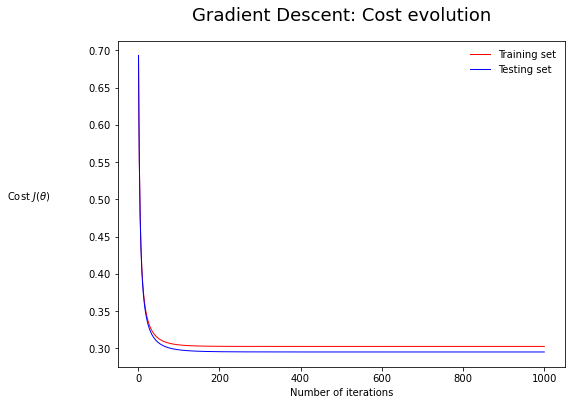

In [ ]:
plot_cost_vs_iter(costs_train, costs_test)

7.1: Describe the plot; what is the fundamental difference between the two series train and test?

The plot shows the cost of the training and testing set as the number of iterations increase. \
The plot shows that as the number of iterations increase, the cost decreases as the model is learning and the parameters are optimized to minimize the cost.\
The fundamental difference is that the testing set has a lower cost than the training set.

7.2: What would it mean if there would be a bigger gap between the test and training values of the cost?

If the gap was bigger, meaning the training set cost was way higher than the testing set cost, it would that the training data quality is low; it might have outliers, noise and the training data iterations might be insuufficient.

# 8. Performance

In [ ]:
def make_predictions(thetas, X, y, boundary=0.5):


    bin_preds = [1 if value > boundary else 0 for value in h_class(X, np.array(thetas))[:,0] ]

    return bin_preds

In [ ]:
# Call the function:
preds = make_predictions(thetas, X_test, y_test, 0.5)

In [ ]:
# Turn y_test into 1D array:
obs_test = y_test[:,0]

8.1 Accuracy

In [ ]:
def get_accuracy(obs_values, pred_values):
    correct_predictions = sum(1 for obs, pred in zip(obs_values, pred_values) if obs == pred)
    total_samples = len(obs_values)
    accuracy = correct_predictions / total_samples
    return accuracy

# Call the function using the test set
accuracy = get_accuracy(obs_test, preds)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 88.06%


8.2 Recall

In [ ]:
def get_recall(obs_values, pred_values):
    true_positives = sum(1 for obs, pred in zip(obs_values, pred_values) if obs == 1 and pred == 1)
    actual_positives = sum(1 for obs in obs_values if obs == 1)

    if actual_positives == 0:
        recall = 0  # Avoid division by zero if there are no actual positives
    else:
        recall = true_positives / actual_positives

    return recall

# Call the function using the test set
recall = get_recall(obs_test, preds)
print(f"Recall: {recall * 100:.2f}%")



Recall: 90.49%
